In [ ]:
import pandas as pd
import regex as re
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
QA_path='/content/Tracie_matress_QA_both_GPT_final (4).csv'
# '/content/Tracie_matress_gpt3.csv'
entail_path='/content/Tracie_matress_GPT3_5_GPT4.csv'
df=pd.read_csv(entail_path)
df.rename(columns={'GPT3':'GPT3_5'},inplace=True)
print(len(df))
df.head(2)

23266


,event_story,answer,Event,Context,key,GPT3_5,GPT4
0,event: The teacher asked us to stop talking st...,positive,The teacher asked us to stop talking starts a...,I was so nervous for my first day of school. ...,TRACIE,True,False
1,event: The teacher asked us to stop talking st...,negative,The teacher asked us to stop talking starts b...,I was so nervous for my first day of school. ...,TRACIE,False,False


# Entailment

## Data Prep

In [ ]:
df.GPT3_5=df.GPT3_5.str.strip()
df.GPT4=df.GPT4.str.strip()
df['answer']=df['answer'].astype(str)
df.GPT3_5.value_counts()
# data.GPT3_5.value_counts()

True                                                                                                                                                  16412
False                                                                                                                                                  6842
TRUE                                                                                                                                                      8
FALSE                                                                                                                                                     2
Cannot be determined.                                                                                                                                     1
The statement "Luke was grounded by his parents after getting into a fight" is not mentioned in the given context. Therefore, the answer is False.        1
Name: GPT3_5, dtype: int64

In [ ]:
df.GPT4.value_counts()

False                                                                                                                 17930
True                                                                                                                   4895
None                                                                                                                    323
Cannot be determined                                                                                                    115
Cannot infer from the text.                                                                                               1
Cannot infer                                                                                                              1
The text does not provide information on when civil suits were filed by shareholders against Mr. Antar and others.        1
Name: GPT4, dtype: int64

In [ ]:
data=df[((df.GPT3_5=='True')|(df.GPT3_5=='False'))&((df.GPT4=='True')|(df.GPT4=='False'))]
print(len(data))

22814


In [ ]:
data['Actual']=data['answer'].apply(lambda x: 'True' if x.strip()=='positive' else 'False' )
data.head(2)

,event_story,answer,Event,Context,key,GPT3_5,GPT4,Actual
0,event: The teacher asked us to stop talking st...,positive,The teacher asked us to stop talking starts a...,I was so nervous for my first day of school. ...,TRACIE,True,False,True
1,event: The teacher asked us to stop talking st...,negative,The teacher asked us to stop talking starts b...,I was so nervous for my first day of school. ...,TRACIE,False,False,False


##Both : Tracie & Mattres

In [ ]:
data['Actual'].value_counts()

False    11472
True     11342
Name: Actual, dtype: int64

In [ ]:
data['GPT3_5'].value_counts()

True     16142
False     6672
Name: GPT3_5, dtype: int64

In [ ]:
data['GPT4'].value_counts()

False    17925
True      4889
Name: GPT4, dtype: int64

**We see here that GPT3 is biased towards True and GPT is biased towards False**

In [ ]:
data['Event']=data['Event'].str.lower()
data['event1']=data['Event'].apply(lambda x: re.split(r'starts after|starts before|ends after|ends before', x)[0])
data['event2']=data['Event'].apply(lambda x: re.split(r'starts after|starts before|ends after|ends before', x)[1])
data['Relation']=data['Event'].apply(lambda x: 'after' if x.find('starts after')>-1 else(
                                  'before' if x.find('starts before')>-1  else (
                                 'after' if x.find('ends after')>-1 else 'before')))

In [ ]:
data.head(2)

,event_story,answer,Event,Context,key,GPT3_5,GPT4,Actual,event1,event2,Relation
0,event: The teacher asked us to stop talking st...,positive,the teacher asked us to stop talking starts a...,I was so nervous for my first day of school. ...,TRACIE,True,False,True,the teacher asked us to stop talking,we talked the whole time during and after cla...,after
1,event: The teacher asked us to stop talking st...,negative,the teacher asked us to stop talking starts b...,I was so nervous for my first day of school. ...,TRACIE,False,False,False,the teacher asked us to stop talking,we talked the whole time during and after cla...,before


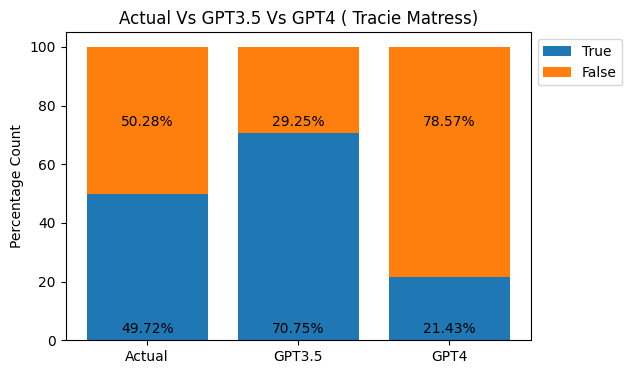

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Actual', 'GPT3.5', 'GPT4']
values1 = [len(data[data.Actual=='True'])/len(data)*100, len(data[data.GPT3_5=='True'])/len(data)*100, len(data[data.GPT4=='True'])/len(data)*100]
values2 = [len(data[data.Actual=='False'])/len(data)*100, len(data[data.GPT3_5=='False'])/len(data)*100, len(data[data.GPT4=='False'])/len(data)*100]

# Creating the stacked bar chart
plt.figure(figsize=(6, 4))

bar1 = plt.bar(categories, values1, label='True')
bar2 = plt.bar(categories, values2, bottom=values1, label='False')

plt.xlabel('')
plt.ylabel('Percentage Count')
plt.title('Actual Vs GPT3.5 Vs GPT4 ( Tracie Matress)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, bars in enumerate([bar1, bar2]):
    for bar in bars:
        height = bar.get_height()
        if i == 0:
            plt.annotate('{}%'.format(round(height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, 0),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            total_height = height
            plt.annotate('{}%'.format(round(total_height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, values1[i]),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

plt.show()

## Tracie

In [ ]:
tracie_data=data[data.key=='TRACIE']
print(len(tracie_data))
tracie_data.head(2)

2530


,event_story,answer,Event,Context,key,GPT3_5,GPT4,Actual,event1,event2,Relation
0,event: The teacher asked us to stop talking st...,positive,the teacher asked us to stop talking starts a...,I was so nervous for my first day of school. ...,TRACIE,True,False,True,the teacher asked us to stop talking,we talked the whole time during and after cla...,after
1,event: The teacher asked us to stop talking st...,negative,the teacher asked us to stop talking starts b...,I was so nervous for my first day of school. ...,TRACIE,False,False,False,the teacher asked us to stop talking,we talked the whole time during and after cla...,before


In [ ]:
print("---------------------Actual-------------------------")
print(tracie_data.Actual.value_counts())
print("---------------------GPT3_5-------------------------")
print(tracie_data.GPT3_5.value_counts())
print("---------------------GPT4-------------------------")
print(tracie_data.GPT4.value_counts())

---------------------Actual-------------------------
False    1286
True     1244
Name: Actual, dtype: int64
---------------------GPT3_5-------------------------
True     1520
False    1010
Name: GPT3_5, dtype: int64
---------------------GPT4-------------------------
False    1664
True      866
Name: GPT4, dtype: int64


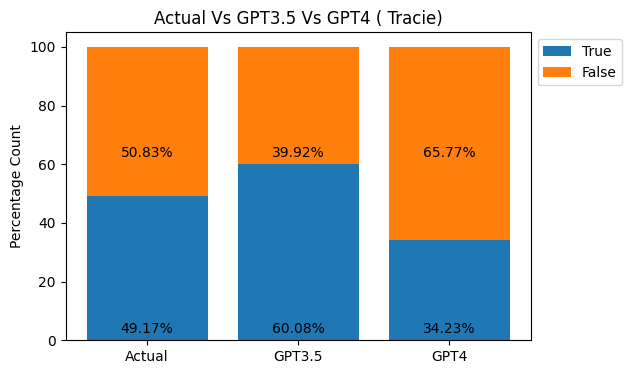

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Actual', 'GPT3.5', 'GPT4']
values1 = [len(tracie_data[tracie_data.Actual=='True'])/len(tracie_data)*100, len(tracie_data[tracie_data.GPT3_5=='True'])/len(tracie_data)*100, len(tracie_data[tracie_data.GPT4=='True'])/len(tracie_data)*100]
values2 = [len(tracie_data[tracie_data.Actual=='False'])/len(tracie_data)*100, len(tracie_data[tracie_data.GPT3_5=='False'])/len(tracie_data)*100, len(tracie_data[tracie_data.GPT4=='False'])/len(tracie_data)*100]

# Creating the stacked bar chart
plt.figure(figsize=(6, 4))

bar1 = plt.bar(categories, values1, label='True')
bar2 = plt.bar(categories, values2, bottom=values1, label='False')

plt.xlabel('')
plt.ylabel('Percentage Count')
plt.title('Actual Vs GPT3.5 Vs GPT4 ( Tracie)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, bars in enumerate([bar1, bar2]):
    for bar in bars:
        height = bar.get_height()
        if i == 0:
            plt.annotate('{}%'.format(round(height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, 0),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            total_height = height
            plt.annotate('{}%'.format(round(total_height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, values1[i]),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

plt.show()

##MATTRESS

In [ ]:
mat_data=data[data.key=='MATRESS']
print(len(mat_data))
mat_data.head(2)

20284


,event_story,answer,Event,Context,key,GPT3_5,GPT4,Actual,event1,event2,Relation
2000,event: The new services allow U.S. Trust to ca...,positive,the new services allow u.s. trust to cater to...,H. Marshall Schwarz was named chairman and ch...,MATRESS,True,False,True,the new services allow u.s. trust to cater to...,quarterly net income this year risen just ove...,after
2001,event: The new services allow U.S. Trust to ca...,negative,the new services allow u.s. trust to cater to...,H. Marshall Schwarz was named chairman and ch...,MATRESS,True,False,False,the new services allow u.s. trust to cater to...,quarterly net income this year risen just ove...,before


In [ ]:
print("---------------------Actual-------------------------")
print(mat_data.Actual.value_counts())
print("---------------------GPT3_5-------------------------")
print(mat_data.GPT3_5.value_counts())
print("---------------------GPT4-------------------------")
print(mat_data.GPT4.value_counts())

---------------------Actual-------------------------
False    10186
True     10098
Name: Actual, dtype: int64
---------------------GPT3_5-------------------------
True     14622
False     5662
Name: GPT3_5, dtype: int64
---------------------GPT4-------------------------
False    16261
True      4023
Name: GPT4, dtype: int64


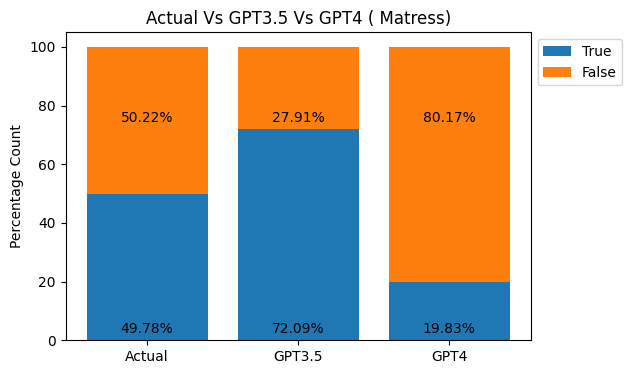

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Actual', 'GPT3.5', 'GPT4']
values1 = [len(mat_data[mat_data.Actual=='True'])/len(mat_data)*100, len(mat_data[mat_data.GPT3_5=='True'])/len(mat_data)*100, len(mat_data[mat_data.GPT4=='True'])/len(mat_data)*100]
values2 = [len(mat_data[mat_data.Actual=='False'])/len(mat_data)*100, len(mat_data[mat_data.GPT3_5=='False'])/len(mat_data)*100, len(mat_data[mat_data.GPT4=='False'])/len(mat_data)*100]

# Creating the stacked bar chart
plt.figure(figsize=(6, 4))

bar1 = plt.bar(categories, values1, label='True')
bar2 = plt.bar(categories, values2, bottom=values1, label='False')

plt.xlabel('')
plt.ylabel('Percentage Count')
plt.title('Actual Vs GPT3.5 Vs GPT4 ( Matress)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, bars in enumerate([bar1, bar2]):
    for bar in bars:
        height = bar.get_height()
        if i == 0:
            plt.annotate('{}%'.format(round(height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, 0),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            total_height = height
            plt.annotate('{}%'.format(round(total_height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, values1[i]),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

plt.show()

Both individually and combined GPT3.5 is biased towards true and GPT 4 is biased towards False.

##Check for consistency

In [ ]:
data.head(2)

,event_story,answer,Event,Context,key,GPT3_5,GPT4,Actual,event1,event2,Relation
0,event: The teacher asked us to stop talking st...,positive,the teacher asked us to stop talking starts a...,I was so nervous for my first day of school. ...,TRACIE,True,False,True,the teacher asked us to stop talking,we talked the whole time during and after cla...,after
1,event: The teacher asked us to stop talking st...,negative,the teacher asked us to stop talking starts b...,I was so nervous for my first day of school. ...,TRACIE,False,False,False,the teacher asked us to stop talking,we talked the whole time during and after cla...,before


In [ ]:
df = data.drop_duplicates(["event1", "event2",'Actual','Relation'])
print(len(df))
df.head(2)

22428


,event_story,answer,Event,Context,key,GPT3_5,GPT4,Actual,event1,event2,Relation
0,event: The teacher asked us to stop talking st...,positive,the teacher asked us to stop talking starts a...,I was so nervous for my first day of school. ...,TRACIE,True,False,True,the teacher asked us to stop talking,we talked the whole time during and after cla...,after
1,event: The teacher asked us to stop talking st...,negative,the teacher asked us to stop talking starts b...,I was so nervous for my first day of school. ...,TRACIE,False,False,False,the teacher asked us to stop talking,we talked the whole time during and after cla...,before


In [ ]:
dt=pd.DataFrame(df.groupby(['event1','event2'],as_index=False).size())
dt.rename(columns={'size':'total_count'},inplace=True)
dt.total_count.value_counts()

2    11025
1      346
4        8
Name: total_count, dtype: int64

In [ ]:
df['duplicates'] = df.groupby(['event1','event2'], sort=False)['event1'].transform('size')
df.head(2)

,event_story,answer,Event,Context,key,GPT3_5,GPT4,Actual,event1,event2,Relation,duplicates
0,event: The teacher asked us to stop talking st...,positive,the teacher asked us to stop talking starts a...,I was so nervous for my first day of school. ...,TRACIE,True,False,True,the teacher asked us to stop talking,we talked the whole time during and after cla...,after,2
1,event: The teacher asked us to stop talking st...,negative,the teacher asked us to stop talking starts b...,I was so nervous for my first day of school. ...,TRACIE,False,False,False,the teacher asked us to stop talking,we talked the whole time during and after cla...,before,2


In [ ]:
final_data=df[df.duplicates==2]
print(len(final_data))
final_data.head(2)

22050


,event_story,answer,Event,Context,key,GPT3_5,GPT4,Actual,event1,event2,Relation,duplicates
0,event: The teacher asked us to stop talking st...,positive,the teacher asked us to stop talking starts a...,I was so nervous for my first day of school. ...,TRACIE,True,False,True,the teacher asked us to stop talking,we talked the whole time during and after cla...,after,2
1,event: The teacher asked us to stop talking st...,negative,the teacher asked us to stop talking starts b...,I was so nervous for my first day of school. ...,TRACIE,False,False,False,the teacher asked us to stop talking,we talked the whole time during and after cla...,before,2


In [ ]:
final_data[0:2]

,event_story,answer,Event,Context,key,GPT3_5,GPT4,Actual,event1,event2,Relation,duplicates
0,event: The teacher asked us to stop talking st...,positive,the teacher asked us to stop talking starts a...,I was so nervous for my first day of school. ...,TRACIE,True,False,True,the teacher asked us to stop talking,we talked the whole time during and after cla...,after,2
1,event: The teacher asked us to stop talking st...,negative,the teacher asked us to stop talking starts b...,I was so nervous for my first day of school. ...,TRACIE,False,False,False,the teacher asked us to stop talking,we talked the whole time during and after cla...,before,2


In [ ]:
final_data.Actual.value_counts()

True     11025
False    11025
Name: Actual, dtype: int64

In [ ]:
print(len(final_data[(final_data.Actual=='True')&(final_data.Relation=='after')]))
print(len(final_data[(final_data.Actual=='True')&(final_data.Relation=='before')]))

4659
6366


In [ ]:
final_data['counts']=final_data.groupby(['event1','event2']).cumcount()
final_data.head(2)

,event_story,answer,Event,Context,key,GPT3_5,GPT4,Actual,event1,event2,Relation,duplicates,counts
0,event: The teacher asked us to stop talking st...,positive,the teacher asked us to stop talking starts a...,I was so nervous for my first day of school. ...,TRACIE,True,False,True,the teacher asked us to stop talking,we talked the whole time during and after cla...,after,2,0
1,event: The teacher asked us to stop talking st...,negative,the teacher asked us to stop talking starts b...,I was so nervous for my first day of school. ...,TRACIE,False,False,False,the teacher asked us to stop talking,we talked the whole time during and after cla...,before,2,1


In [ ]:
final_data['counts'].value_counts()

0    11025
1    11025
Name: counts, dtype: int64

In [ ]:
final_data['samelabel_gtp3_5']=final_data.groupby(['event1','event2','GPT3_5'], sort=False)['event1'].transform('size')
final_data['samelabel_gtp4']=final_data.groupby(['event1','event2','GPT4'], sort=False)['event1'].transform('size')
final_data.head(2)

,event_story,answer,Event,Context,key,GPT3_5,GPT4,Actual,event1,event2,Relation,duplicates,counts,samelabel_gtp3_5,samelabel_gtp4
0,event: The teacher asked us to stop talking st...,positive,the teacher asked us to stop talking starts a...,I was so nervous for my first day of school. ...,TRACIE,True,False,True,the teacher asked us to stop talking,we talked the whole time during and after cla...,after,2,0,1,2
1,event: The teacher asked us to stop talking st...,negative,the teacher asked us to stop talking starts b...,I was so nervous for my first day of school. ...,TRACIE,False,False,False,the teacher asked us to stop talking,we talked the whole time during and after cla...,before,2,1,1,2


In [ ]:
final_data.Context[1]

' I was so nervous for my first day of school. "When I arrived at my first class, I was shaking." I sat next the prettiest girl in class. We talked the whole time during and after class. "We became best friends, and she made college so much easier!"'

In [ ]:
# print("context:'{0}'.\nE1:'{1}'.\nE2:'{2}'.\nFor the given context, give the temporal relation between E1 and E2 as before or after. Give your answer in the format, Relation:<ans>".format(final_data.Context[0],
#       final_data.event1[0],final_data.event2[0]))
print("context:'{0}'.\nFor the given context,state if the statement event:'{1}' is True or False. Give your answer in the format , Ans:<ans>".format(final_data.Context[1],
      final_data.Event[1]))

context:' I was so nervous for my first day of school. "When I arrived at my first class, I was shaking." I sat next the prettiest girl in class. We talked the whole time during and after class. "We became best friends, and she made college so much easier!"'.
For the given context,state if the statement event:' the teacher asked us to stop talking starts before we talked the whole time during and after class. ' is True or False. Give your answer in the format , Ans:<ans>


In [ ]:
print("1- consistent (TF/FT)    2- Inconsistent ( TT/FF)")
print("*******************************************")
print("GPT 3.5")
print(final_data.samelabel_gtp3_5.value_counts())
print("*******************************************")
print("GPT 4")
print(final_data.samelabel_gtp4.value_counts())
print("*******************************************")
print("Here Label 1 says that one of the values is true and other is false in a pair. Label 2 is if both the values in the pair are either true or False")

1- consistent (TF/FT)    2- Inconsistent ( TT/FF)
*******************************************
GPT 3.5
2    18364
1     3686
Name: samelabel_gtp3_5, dtype: int64
*******************************************
GPT 4
2    14794
1     7256
Name: samelabel_gtp4, dtype: int64
*******************************************
Here Label 1 says that one of the values is true and other is false in a pair. Label 2 is if both the values in the pair are either true or False


In [ ]:
consistent_GPT3_5=final_data[final_data.samelabel_gtp3_5==1]
inconsistent_GPT3_5=final_data[final_data.samelabel_gtp3_5==2]

consistent_GPT4=final_data[final_data.samelabel_gtp4==1]
inconsistent_GPT4=final_data[final_data.samelabel_gtp4==2]

In [ ]:
# import matplotlib.pyplot as plt
# # total_len=len(consistent_GPT3_5)
# # Sample data
# val1=final_data.samelabel_gtp3_5.value_counts().sort_index().values.tolist()
# val2=final_data.samelabel_gtp4.value_counts().sort_index().values.tolist()
# categories = ['GPT3.5', 'GPT4']
# values1 = [val1[0] /len(final_data)*100,val2[0] /len(final_data)*100 ]
# values2 = [val1[1] /len(final_data)*100,val2[1] /len(final_data)*100]
# # values2 = [df.samelabel_gtp4.value_counts()/len(df)*100]

# # Creating the stacked bar chart
# plt.figure(figsize=(6, 4))

# bar1 = plt.bar(categories, values1, label='Consistent')
# bar2 = plt.bar(categories, values2, bottom=values1, label='Inconsistent')

# plt.xlabel('')
# plt.ylabel('Percentage Count')
# plt.title('Actual Vs GPT3.5 Vs GPT4')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# for i, bars in enumerate([bar1, bar2]):
#     for bar in bars:
#         height = bar.get_height()
#         if i == 0:
#             plt.annotate('{}%'.format(round(height,2)),
#                          xy=(bar.get_x() + bar.get_width() / 2, 0),
#                          xytext=(0, 3),  # 3 points vertical offset
#                          textcoords="offset points",
#                          ha='center', va='bottom')
#         else:
#             total_height = height
#             plt.annotate('{}%'.format(round(total_height,2)),
#                          xy=(bar.get_x() + bar.get_width() / 2, values1[i]),
#                          xytext=(0, 3),  # 3 points vertical offset
#                          textcoords="offset points",
#                          ha='center', va='bottom')

# plt.show()

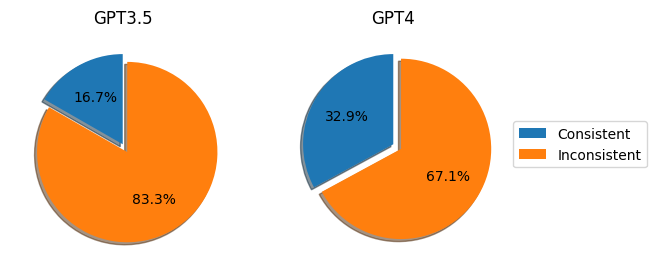

In [ ]:
val1=final_data.samelabel_gtp3_5.value_counts().sort_index().values.tolist()
val2=final_data.samelabel_gtp4.value_counts().sort_index().values.tolist()
categories = ['GPT3.5', 'GPT4']
values1 = [val1[0] /len(final_data)*100,val2[0] /len(final_data)*100 ]
values2 = [val1[1] /len(final_data)*100,val2[1] /len(final_data)*100]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
labels = 'Consistent', 'Inconsistent'
sizes = [val1[0] /len(final_data)*100,val1[1] /len(final_data)*100]
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title("GPT3.5")
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',
       shadow=True, startangle=90)
sizes = [val2[0] /len(final_data)*100,val2[1] /len(final_data)*100]
ax2.set_title("GPT4")
ax2.pie(sizes, explode=explode,  autopct='%1.1f%%',
       shadow=True, startangle=90)
ax2.legend(labels,
          title="",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


###Consistent GPT3_5 & 4

In [ ]:
consistent_GPT3_5.head(2)

,event_story,answer,Event,Context,key,GPT3_5,GPT4,Actual,event1,event2,Relation,duplicates,counts,samelabel_gtp3_5,samelabel_gtp4
0,event: The teacher asked us to stop talking st...,positive,the teacher asked us to stop talking starts a...,I was so nervous for my first day of school. ...,TRACIE,True,False,True,the teacher asked us to stop talking,we talked the whole time during and after cla...,after,2,0,1,2
1,event: The teacher asked us to stop talking st...,negative,the teacher asked us to stop talking starts b...,I was so nervous for my first day of school. ...,TRACIE,False,False,False,the teacher asked us to stop talking,we talked the whole time during and after cla...,before,2,1,1,2


In [ ]:
consistent_GPT3_5.Actual.value_counts()

True     1843
False    1843
Name: Actual, dtype: int64

In [ ]:
consistent_GPT3_5.GPT3_5.value_counts()

True     1843
False    1843
Name: GPT3_5, dtype: int64

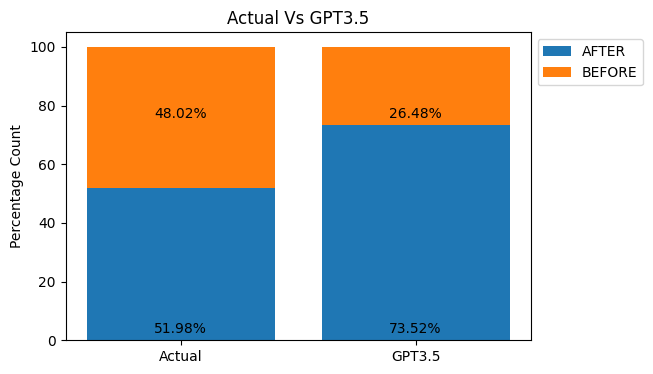

In [ ]:
import matplotlib.pyplot as plt
total_len=len(consistent_GPT3_5)
# Sample data
categories = ['Actual', 'GPT3.5']
values1 = [len(consistent_GPT3_5[((consistent_GPT3_5['Actual']=='True')& (consistent_GPT3_5['Relation']=='after'))|((consistent_GPT3_5['Actual']=='False')& (consistent_GPT3_5['Relation']=='before'))])/len(consistent_GPT3_5)*100,
           len(consistent_GPT3_5[((consistent_GPT3_5['GPT3_5']=='True')& (consistent_GPT3_5['Relation']=='after'))|((consistent_GPT3_5['GPT3_5']=='False')& (consistent_GPT3_5['Relation']=='before'))])/len(consistent_GPT3_5)*100]
values2 = [len(consistent_GPT3_5[((consistent_GPT3_5['Actual']=='True')& (consistent_GPT3_5['Relation']=='before'))|((consistent_GPT3_5['Actual']=='False')& (consistent_GPT3_5['Relation']=='after'))])/len(consistent_GPT3_5)*100,
           len(consistent_GPT3_5[((consistent_GPT3_5['GPT3_5']=='True')& (consistent_GPT3_5['Relation']=='before'))|((consistent_GPT3_5['GPT3_5']=='False')& (consistent_GPT3_5['Relation']=='after'))])/len(consistent_GPT3_5)*100]
# values2 = [len(consistent_GPT3_5[(consistent_GPT3_5['Entailment_actual']=='True')& (consistent_GPT3_5['Relation']=='BEFORE')])/total_len*100,
#            len(consistent_GPT3_5[(consistent_GPT3_5['GPT3_5_ET']=='True')& (consistent_GPT3_5['Relation']=='BEFORE')])/total_len*100]

# Creating the stacked bar chart
plt.figure(figsize=(6, 4))

bar1 = plt.bar(categories, values1, label='AFTER')
bar2 = plt.bar(categories, values2, bottom=values1, label='BEFORE')

plt.xlabel('')
plt.ylabel('Percentage Count')
plt.title('Actual Vs GPT3.5')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, bars in enumerate([bar1, bar2]):
    for bar in bars:
        height = bar.get_height()
        if i == 0:
            plt.annotate('{}%'.format(round(height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, 0),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            total_height = height
            plt.annotate('{}%'.format(round(total_height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, values1[i]),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

plt.show()


In [ ]:
consistent_GPT4.Actual.value_counts()

True     3628
False    3628
Name: Actual, dtype: int64

In [ ]:
consistent_GPT4.GPT4.value_counts()

True     3628
False    3628
Name: GPT4, dtype: int64

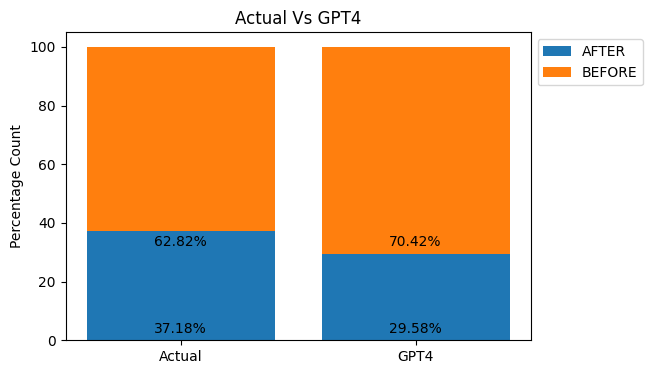

In [ ]:
import matplotlib.pyplot as plt
total_len=len(consistent_GPT4)
# Sample data
categories = ['Actual', 'GPT4']
values1 = [len(consistent_GPT4[((consistent_GPT4['Actual']=='True')& (consistent_GPT4['Relation']=='after'))|((consistent_GPT4['Actual']=='False')& (consistent_GPT4['Relation']=='before'))])/len(consistent_GPT4)*100,
           len(consistent_GPT4[((consistent_GPT4['GPT4']=='True')& (consistent_GPT4['Relation']=='after'))|((consistent_GPT4['GPT4']=='False')& (consistent_GPT4['Relation']=='before'))])/len(consistent_GPT4)*100]
values2 = [len(consistent_GPT4[((consistent_GPT4['Actual']=='True')& (consistent_GPT4['Relation']=='before'))|((consistent_GPT4['Actual']=='False')& (consistent_GPT4['Relation']=='after'))])/len(consistent_GPT4)*100,
           len(consistent_GPT4[((consistent_GPT4['GPT4']=='True')& (consistent_GPT4['Relation']=='before'))|((consistent_GPT4['GPT4']=='False')& (consistent_GPT4['Relation']=='after'))])/len(consistent_GPT4)*100]
# values2 = [len(consistent_GPT3_5[(consistent_GPT3_5['Entailment_actual']=='True')& (consistent_GPT3_5['Relation']=='BEFORE')])/total_len*100,
#            len(consistent_GPT3_5[(consistent_GPT3_5['GPT3_5_ET']=='True')& (consistent_GPT3_5['Relation']=='BEFORE')])/total_len*100]

# Creating the stacked bar chart
plt.figure(figsize=(6, 4))

bar1 = plt.bar(categories, values1, label='AFTER')
bar2 = plt.bar(categories, values2, bottom=values1, label='BEFORE')

plt.xlabel('')
plt.ylabel('Percentage Count')
plt.title('Actual Vs GPT4')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, bars in enumerate([bar1, bar2]):
    for bar in bars:
        height = bar.get_height()
        if i == 0:
            plt.annotate('{}%'.format(round(height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, 0),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            total_height = height
            plt.annotate('{}%'.format(round(total_height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, values1[i]),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# total_len=len(consistent_GPT4)
# # Sample data
# categories = ['Actual', 'GPT4']
# values1 = [len(consistent_GPT4[(consistent_GPT4['Actual']=='True')& (consistent_GPT4['Relation']=='after')])/total_len*100,
#            len(consistent_GPT4[(consistent_GPT4['GPT4']=='True')& (consistent_GPT4['Relation']=='after')])/total_len*100]
# values2 = [len(consistent_GPT4[(consistent_GPT4['Actual']=='True')& (consistent_GPT4['Relation']=='before')])/total_len*100,
#            len(consistent_GPT4[(consistent_GPT4['GPT4']=='True')& (consistent_GPT4['Relation']=='before')])/total_len*100]

# # Creating the stacked bar chart
# plt.figure(figsize=(6, 4))

# bar1 = plt.bar(categories, values1, label='AFTER')
# bar2 = plt.bar(categories, values2, bottom=values1, label='BEFORE')

# plt.xlabel('')
# plt.ylabel('Percentage Count')
# plt.title('Actual Vs GPT3.5 Vs GPT4 (True)')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# for i, bars in enumerate([bar1, bar2]):
#     for bar in bars:
#         height = bar.get_height()
#         if i == 0:
#             plt.annotate('{}%'.format(round(height,2)),
#                          xy=(bar.get_x() + bar.get_width() / 2, 0),
#                          xytext=(0, 3),  # 3 points vertical offset
#                          textcoords="offset points",
#                          ha='center', va='bottom')
#         else:
#             total_height = height
#             plt.annotate('{}%'.format(round(total_height,2)),
#                          xy=(bar.get_x() + bar.get_width() / 2,height),
#                          xytext=(0, 3),  # 3 points vertical offset
#                          textcoords="offset points",
#                          ha='center', va='bottom')

# plt.show()

Same number of true or false, so for each pair one value is predicted as true and other as false. But we see that its baised towards after.

###Inconsistent GPT3_5

In [ ]:
inconsistent_GPT3_5.head(2)

,event_story,answer,Event,Context,key,GPT3_5,GPT4,Actual,event1,event2,Relation,duplicates,counts,samelabel_gtp3_5,samelabel_gtp4
2,event: The man was holding a piece of paper st...,positive,the man was holding a piece of paper starts b...,"John didn't know he was being followed. ""When...",TRACIE,True,True,True,the man was holding a piece of paper,he hand john a small piece of paper,before,2,0,2,1
3,event: The man was holding a piece of paper st...,negative,the man was holding a piece of paper starts a...,"John didn't know he was being followed. ""When...",TRACIE,True,False,False,the man was holding a piece of paper,he hand john a small piece of paper,after,2,1,2,1


In [ ]:
print(len(inconsistent_GPT3_5)/len(final_data)*100)

83.28344671201813


In [ ]:
inconsistent_GPT3_5.GPT3_5.value_counts()

True     13786
False     4578
Name: GPT3_5, dtype: int64

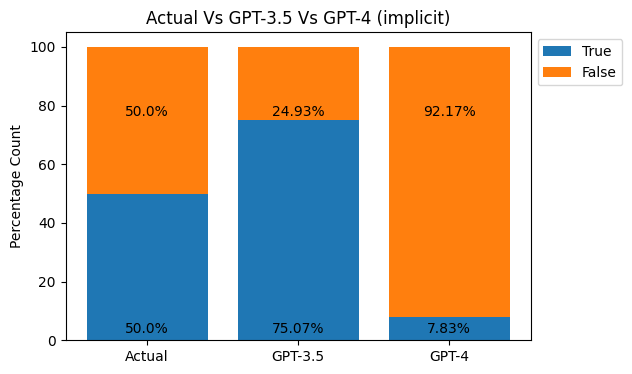

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Actual', 'GPT-3.5','GPT-4']
values1 = [len(inconsistent_GPT3_5[inconsistent_GPT3_5.Actual=='True'])/len(inconsistent_GPT3_5)*100, len(inconsistent_GPT3_5[inconsistent_GPT3_5.GPT3_5=='True'])/len(inconsistent_GPT3_5)*100,len(inconsistent_GPT4[inconsistent_GPT4.GPT4=='True'])/len(inconsistent_GPT4)*100]
values2 = [len(inconsistent_GPT3_5[inconsistent_GPT3_5.Actual=='False'])/len(inconsistent_GPT3_5)*100, len(inconsistent_GPT3_5[inconsistent_GPT3_5.GPT3_5=='False'])/len(inconsistent_GPT3_5)*100,len(inconsistent_GPT4[inconsistent_GPT4.GPT4=='False'])/len(inconsistent_GPT4)*100]

# Creating the stacked bar chart
plt.figure(figsize=(6, 4))

bar1 = plt.bar(categories, values1, label='True')
bar2 = plt.bar(categories, values2, bottom=values1, label='False')

plt.xlabel('')
plt.ylabel('Percentage Count')
plt.title('Actual Vs GPT-3.5 Vs GPT-4 (implicit)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, bars in enumerate([bar1, bar2]):
    for bar in bars:
        height = bar.get_height()
        if i == 0:
            plt.annotate('{}%'.format(round(height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, 0),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            total_height = height
            plt.annotate('{}%'.format(round(total_height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, values1[i]-1),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

plt.show()

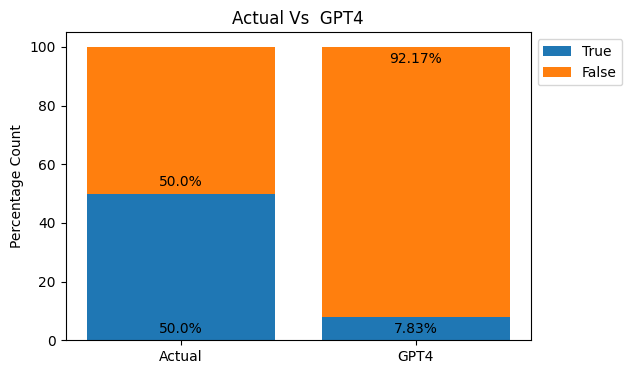

In [ ]:

import matplotlib.pyplot as plt

# Sample data
categories = ['Actual', 'GPT4']
values1 = [len(inconsistent_GPT4[inconsistent_GPT4.Actual=='True'])/len(inconsistent_GPT4)*100, len(inconsistent_GPT4[inconsistent_GPT4.GPT4=='True'])/len(inconsistent_GPT4)*100]
values2 = [len(inconsistent_GPT4[inconsistent_GPT4.Actual=='False'])/len(inconsistent_GPT4)*100, len(inconsistent_GPT4[inconsistent_GPT4.GPT4=='False'])/len(inconsistent_GPT4)*100]

# Creating the stacked bar chart
plt.figure(figsize=(6, 4))

bar1 = plt.bar(categories, values1, label='True')
bar2 = plt.bar(categories, values2, bottom=values1, label='False')

plt.xlabel('')
plt.ylabel('Percentage Count')
plt.title('Actual Vs  GPT4')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, bars in enumerate([bar1, bar2]):
    for bar in bars:
        height = bar.get_height()
        if i == 0:
            plt.annotate('{}%'.format(round(height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, 0),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            total_height = height
            plt.annotate('{}%'.format(round(total_height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

plt.show()

Inconsistent data : biased towards true

Consistent - 3.5 biased towards AFTER
inconsistent - 3.5

#QA Format

In [ ]:
QA_data=pd.read_csv(QA_path)
print(len(QA_data))
QA_data.head(2)

11652


,event_story,answer,Event,Context,key,GPT3,GPT4,event1,event2,Relation,GPT3_5_QA,GPT4_QA
0,event: The teacher asked us to stop talking st...,positive,the teacher asked us to stop talking starts a...,I was so nervous for my first day of school. ...,TRACIE,True,False,the teacher asked us to stop talking,we talked the whole time during and after cla...,after,before,before
1,event: The man was holding a piece of paper st...,positive,the man was holding a piece of paper starts b...,"John didn't know he was being followed. ""When...",TRACIE,True,True,the man was holding a piece of paper,he hand john a small piece of paper,before,after,Before


##Data Prep

In [ ]:
QA_data.GPT3_5_QA.value_counts()

 after                                                                                                                                5298
 before                                                                                                                               5261
after                                                                                                                                  919
 E1 before E2                                                                                                                           49
 After                                                                                                                                  26
 E2 before E1                                                                                                                           16
 E2 is after E1                                                                                                                          5
 E1 after E2               

In [ ]:
QA_data.GPT3_5_QA=QA_data.GPT3_5_QA.astype(str)
QA_data.Relation=QA_data.Relation.str.upper()

In [ ]:
QA_data['GPT3_5']=QA_data.GPT3_5_QA.apply(lambda x: 'AFTER' if x.find('after')>-1 else(
                                  'BEFORE' if x.find('before')>-1  else 'None'
                                 ))
QA_data['GPT3_5'].value_counts()

AFTER     6232
BEFORE    5329
None        91
Name: GPT3_5, dtype: int64

In [ ]:
QA_data.Relation.value_counts()

BEFORE    6735
AFTER     4917
Name: Relation, dtype: int64

In [ ]:
QA_data['GPT4']=QA_data.GPT4_QA.apply(lambda x: 'AFTER' if x.find('after')>-1 else(
                                  'BEFORE' if x.find('before')>-1  else 'None'
                                 ))
QA_data['GPT4'].value_counts()

BEFORE    6811
AFTER     4594
None       247
Name: GPT4, dtype: int64

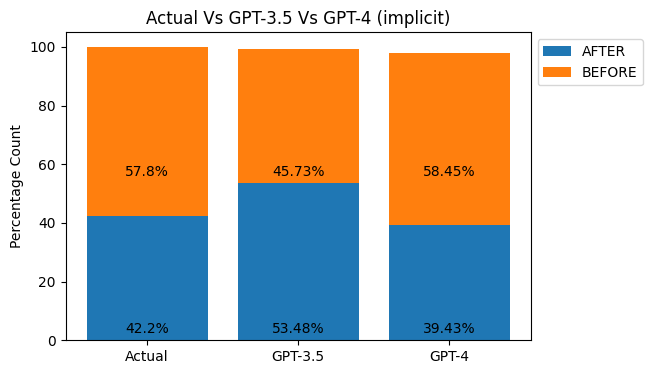

In [ ]:
import matplotlib.pyplot as plt
total_len=len(QA_data)
# Sample data
categories = ['Actual', 'GPT-3.5','GPT-4']
values1 = [len(QA_data[(QA_data['Relation']=='AFTER')])/total_len*100,
           len(QA_data[(QA_data['GPT3_5']=='AFTER')])/total_len*100,
           len(QA_data[(QA_data['GPT4']=='AFTER')])/total_len*100]
values2 = [len(QA_data[(QA_data['Relation']=='BEFORE')])/total_len*100,
           len(QA_data[(QA_data['GPT3_5']=='BEFORE')])/total_len*100,
           len(QA_data[(QA_data['GPT4']=='BEFORE')])/total_len*100]

# Creating the stacked bar chart
plt.figure(figsize=(6, 4))

bar1 = plt.bar(categories, values1, label='AFTER')
bar2 = plt.bar(categories, values2, bottom=values1, label='BEFORE')

plt.xlabel('')
plt.ylabel('Percentage Count')
plt.title('Actual Vs GPT-3.5 Vs GPT-4 (implicit)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, bars in enumerate([bar1, bar2]):
    for bar in bars:
        height = bar.get_height()
        if i == 0:
            plt.annotate('{}%'.format(round(height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, 0),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            total_height = height
            plt.annotate('{}%'.format(round(total_height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, values1[i]),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

plt.show()

#Accuracy, Precision , F1 and confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import seaborn as sns

In [ ]:
qa_data=QA_data

QA 3.5 Actual
 BEFORE    6735
AFTER     4917
Name: Relation, dtype: int64
------------------------------------------------------------------------------
QA 3.5 GPT3.5
 AFTER     6232
BEFORE    5329
None        91
Name: GPT3_5, dtype: int64
------------------------------------------------------------------------------
Accuracy: 45.57%
Precision of AFTER & BEFORE ['0.39', '0.54', '0.00']
F1 of AFTER & BEFORE ['0.44', '0.48', '0.00']
Recall of AFTER & BEFORE ['0.49', '0.43', '0.00']
-----------------------------------------------------------------------------
        AFTER  BEFORE  NONE
AFTER    2433    2452    32
BEFORE   3799    2877    59
NONE        0       0     0


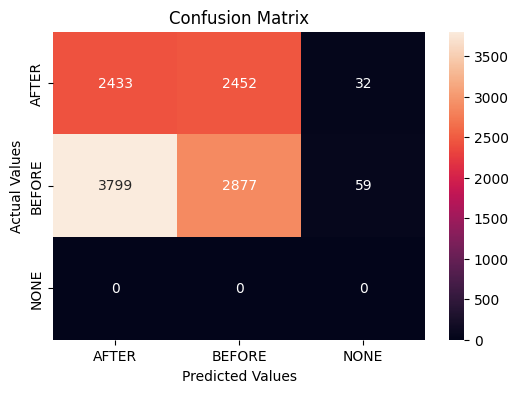

In [ ]:
QAacc3_5 = accuracy_score(qa_data.Relation, qa_data.GPT3_5)
print("QA 3.5 Actual\n",qa_data.Relation.value_counts())
print("------------------------------------------------------------------------------")
print("QA 3.5 GPT3.5\n",qa_data.GPT3_5.value_counts())
print("------------------------------------------------------------------------------")
print(f"Accuracy: {QAacc3_5 * 100:.2f}%")
precision = precision_score(qa_data.Relation, qa_data.GPT3_5, average=None)
print("Precision of AFTER & BEFORE", str(list(map('{:.2f}'.format,precision))))
f1 = f1_score(qa_data.Relation, qa_data.GPT3_5, average=None)
print("F1 of AFTER & BEFORE",str(list(map('{:.2f}'.format,f1))))
recall = recall_score(qa_data.Relation, qa_data.GPT3_5,average=None)
print("Recall of AFTER & BEFORE",str(list(map('{:.2f}'.format,recall))))
print("-----------------------------------------------------------------------------")
# confusion_matrix(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET)
# pd.crosstab(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET, rownames = ['Actual'], colnames =['Predicted'], margins = True)
cm = confusion_matrix(qa_data.Relation, qa_data.GPT3_5)
plt.figure(figsize=(6,4))
cm_df = pd.DataFrame(cm,
                     index = ['AFTER','BEFORE','NONE'],
                     columns =  ['AFTER','BEFORE','NONE'])
print(cm_df)
sns.heatmap(cm_df, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Consistent Actual
 True     1843
False    1843
Name: Actual, dtype: int64
------------------------------------------------------------------------------
Consistent GPT3.5
 True     1843
False    1843
Name: GPT3_5, dtype: int64
------------------------------------------------------------------------------
Accuracy: 64.79%
Precision of False & True ['0.65', '0.65']
F1 of False & True ['0.65', '0.65']
Recall of False & True ['0.65', '0.65']
-----------------------------------------------------------------------------
       False  True
False   1194   649
True     649  1194


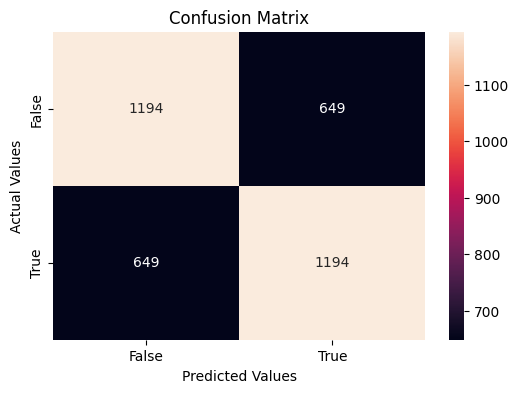

In [ ]:
consis_acc3_5= accuracy_score(consistent_GPT3_5.Actual, consistent_GPT3_5.GPT3_5)
print("Consistent Actual\n",consistent_GPT3_5.Actual.value_counts())
print("------------------------------------------------------------------------------")
print("Consistent GPT3.5\n",consistent_GPT3_5.GPT3_5.value_counts())
print("------------------------------------------------------------------------------")
print(f"Accuracy: {consis_acc3_5 * 100:.2f}%")
precision = precision_score(consistent_GPT3_5.Actual, consistent_GPT3_5.GPT3_5, average=None)
print("Precision of False & True", str(list(map('{:.2f}'.format,precision))))
f1 = f1_score(consistent_GPT3_5.Actual, consistent_GPT3_5.GPT3_5, average=None)
print("F1 of False & True",str(list(map('{:.2f}'.format,f1))))
recall = recall_score(consistent_GPT3_5.Actual, consistent_GPT3_5.GPT3_5,average=None)
print("Recall of False & True",str(list(map('{:.2f}'.format,recall))))
print("-----------------------------------------------------------------------------")
# confusion_matrix(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET)
# pd.crosstab(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET, rownames = ['Actual'], colnames =['Predicted'], margins = True)
cm = confusion_matrix(consistent_GPT3_5.Actual, consistent_GPT3_5.GPT3_5)
plt.figure(figsize=(6,4))
cm_df = pd.DataFrame(cm,
                     index = ['False','True'],
                     columns =  ['False','True'])
print(cm_df)
sns.heatmap(cm_df, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Inconsistent Actual
 True     9182
False    9182
Name: Actual, dtype: int64
------------------------------------------------------------------------------
Inconsistent GPT3.5
 True     13786
False     4578
Name: GPT3_5, dtype: int64
------------------------------------------------------------------------------
Accuracy: 50.00%
Precision of False & True ['0.50', '0.50']
F1 of False & True ['0.33', '0.60']
Recall of False & True ['0.25', '0.75']
-----------------------------------------------------------------------------
       False  True
False   2289  6893
True    2289  6893


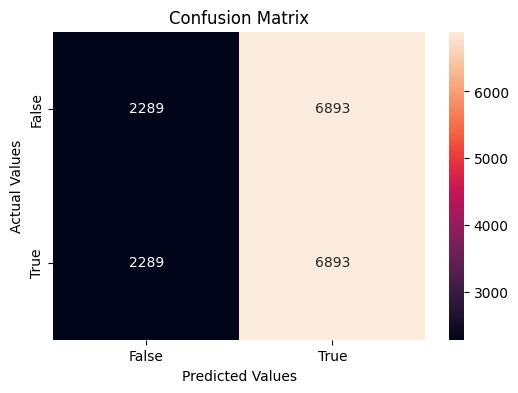

In [ ]:
inconsis_acc3_5= accuracy_score(inconsistent_GPT3_5.Actual, inconsistent_GPT3_5.GPT3_5)
print("Inconsistent Actual\n",inconsistent_GPT3_5.Actual.value_counts())
print("------------------------------------------------------------------------------")
print("Inconsistent GPT3.5\n",inconsistent_GPT3_5.GPT3_5.value_counts())
print("------------------------------------------------------------------------------")
print(f"Accuracy: {inconsis_acc3_5 * 100:.2f}%")
precision = precision_score(inconsistent_GPT3_5.Actual, inconsistent_GPT3_5.GPT3_5, average=None)
print("Precision of False & True", str(list(map('{:.2f}'.format,precision))))
f1 = f1_score(inconsistent_GPT3_5.Actual, inconsistent_GPT3_5.GPT3_5, average=None)
print("F1 of False & True",str(list(map('{:.2f}'.format,f1))))
recall = recall_score(inconsistent_GPT3_5.Actual, inconsistent_GPT3_5.GPT3_5,average=None)
print("Recall of False & True",str(list(map('{:.2f}'.format,recall))))
print("-----------------------------------------------------------------------------")
# confusion_matrix(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET)
# pd.crosstab(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET, rownames = ['Actual'], colnames =['Predicted'], margins = True)
cm = confusion_matrix(inconsistent_GPT3_5.Actual, inconsistent_GPT3_5.GPT3_5)
plt.figure(figsize=(6,4))
cm_df = pd.DataFrame(cm,
                     index = ['False','True'],
                     columns =  ['False','True'])
print(cm_df)
sns.heatmap(cm_df, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

QA Actual
 BEFORE    6735
AFTER     4917
Name: Relation, dtype: int64
------------------------------------------------------------------------------
QA GPT3.5
 BEFORE    6811
AFTER     4594
None       247
Name: GPT4, dtype: int64
------------------------------------------------------------------------------
Accuracy: 65.02%
Precision of AFTER & BEFORE ['0.60', '0.70', '0.00']
F1 of  AFTER & BEFORE ['0.58', '0.71', '0.00']
Recall of  AFTER & BEFORE ['0.57', '0.71', '0.00']
-----------------------------------------------------------------------------
        AFTER  BEFORE  None
AFTER    2779    2014   124
BEFORE   1815    4797   123
None        0       0     0


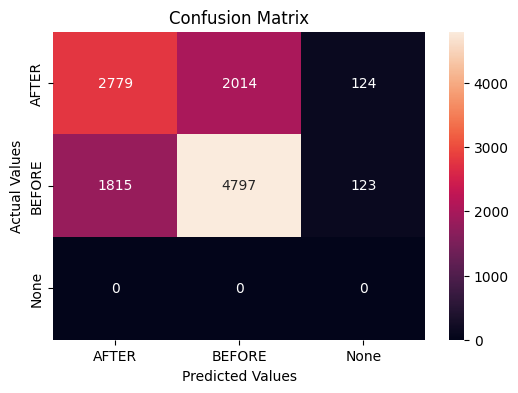

In [ ]:
QA_acc4= accuracy_score(qa_data.Relation, qa_data.GPT4)
print("QA Actual\n",qa_data.Relation.value_counts())
print("------------------------------------------------------------------------------")
print("QA GPT3.5\n",qa_data.GPT4.value_counts())
print("------------------------------------------------------------------------------")
print(f"Accuracy: {QA_acc4 * 100:.2f}%")
precision = precision_score(qa_data.Relation, qa_data.GPT4, average=None)
print("Precision of AFTER & BEFORE", str(list(map('{:.2f}'.format,precision))))
f1 = f1_score(qa_data.Relation, qa_data.GPT4, average=None)
print("F1 of  AFTER & BEFORE",str(list(map('{:.2f}'.format,f1))))
recall = recall_score(qa_data.Relation, qa_data.GPT4,average=None)
print("Recall of  AFTER & BEFORE",str(list(map('{:.2f}'.format,recall))))
print("-----------------------------------------------------------------------------")
# confusion_matrix(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET)
# pd.crosstab(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET, rownames = ['Actual'], colnames =['Predicted'], margins = True)
cm = confusion_matrix(qa_data.Relation, qa_data.GPT4)
plt.figure(figsize=(6,4))
cm_df = pd.DataFrame(cm,
                     index = ['AFTER','BEFORE','None'],
                     columns =  ['AFTER','BEFORE','None'])
print(cm_df)
sns.heatmap(cm_df, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Consistent GPT4 actual
 True     3628
False    3628
Name: Actual, dtype: int64
------------------------------------------------------------------------------
Consistent GPT4
 True     3628
False    3628
Name: GPT4, dtype: int64
------------------------------------------------------------------------------
Accuracy: 81.42%
Precision of 'False','None','True' ['0.81', '0.81']
F1 of 'False','None','True' ['0.81', '0.81']
Recall of 'False','None','True' ['0.81', '0.81']
-----------------------------------------------------------------------------
       False  True
False   2954   674
True     674  2954


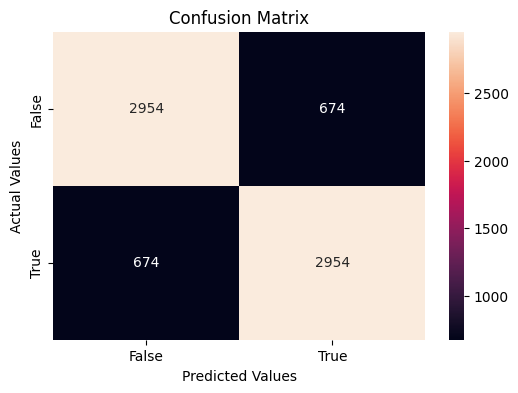

In [ ]:
consis_acc4= accuracy_score(consistent_GPT4.Actual, consistent_GPT4.GPT4)
print("Consistent GPT4 actual\n",consistent_GPT4.Actual.value_counts())
print("------------------------------------------------------------------------------")
print("Consistent GPT4\n",consistent_GPT4.GPT4.value_counts())
print("------------------------------------------------------------------------------")
print(f"Accuracy: {consis_acc4 * 100:.2f}%")
precision = precision_score(consistent_GPT4.Actual, consistent_GPT4.GPT4, average=None)
print("Precision of 'False','None','True'", str(list(map('{:.2f}'.format,precision))))
f1 = f1_score(consistent_GPT4.Actual, consistent_GPT4.GPT4, average=None)
print("F1 of 'False','None','True'",str(list(map('{:.2f}'.format,f1))))
recall = recall_score(consistent_GPT4.Actual, consistent_GPT4.GPT4,average=None)
print("Recall of 'False','None','True'",str(list(map('{:.2f}'.format,recall))))
print("-----------------------------------------------------------------------------")
# confusion_matrix(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET)
# pd.crosstab(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET, rownames = ['Actual'], colnames =['Predicted'], margins = True)
cm = confusion_matrix(consistent_GPT4.Actual, consistent_GPT4.GPT4)
plt.figure(figsize=(6,4))
cm_df = pd.DataFrame(cm,
                     index = ['False','True'],
                     columns = ['False','True'])
print(cm_df)
sns.heatmap(cm_df, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Inconsistent GPT4 actual
 True     7397
False    7397
Name: Actual, dtype: int64
------------------------------------------------------------------------------
Inconsistent GPT4
 False    13636
True      1158
Name: GPT4, dtype: int64
------------------------------------------------------------------------------
Accuracy: 50.00%
Precision of 'False','None','True' ['0.50', '0.50']
F1 of 'False','None','True' ['0.65', '0.14']
Recall of 'False','None','True' ['0.92', '0.08']
-----------------------------------------------------------------------------
       False  True
False   6818   579
True    6818   579


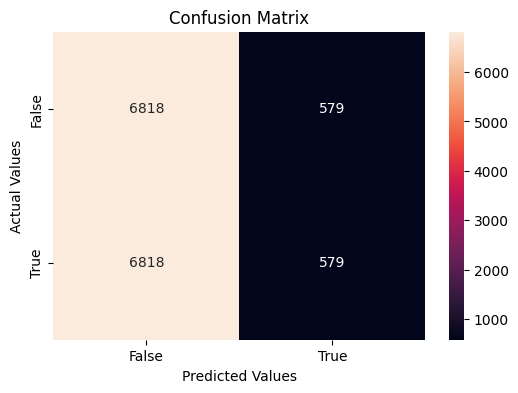

In [ ]:
inconsis_acc4= accuracy_score(inconsistent_GPT4.Actual, inconsistent_GPT4.GPT4)
print("Inconsistent GPT4 actual\n",inconsistent_GPT4.Actual.value_counts())
print("------------------------------------------------------------------------------")
print("Inconsistent GPT4\n",inconsistent_GPT4.GPT4.value_counts())
print("------------------------------------------------------------------------------")
print(f"Accuracy: {inconsis_acc4 * 100:.2f}%")
precision = precision_score(inconsistent_GPT4.Actual, inconsistent_GPT4.GPT4, average=None)
print("Precision of 'False','None','True'", str(list(map('{:.2f}'.format,precision))))
f1 = f1_score(inconsistent_GPT4.Actual, inconsistent_GPT4.GPT4, average=None)
print("F1 of 'False','None','True'",str(list(map('{:.2f}'.format,f1))))
recall = recall_score(inconsistent_GPT4.Actual, inconsistent_GPT4.GPT4,average=None)
print("Recall of 'False','None','True'",str(list(map('{:.2f}'.format,recall))))
print("-----------------------------------------------------------------------------")
# confusion_matrix(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET)
# pd.crosstab(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET, rownames = ['Actual'], colnames =['Predicted'], margins = True)
cm = confusion_matrix(inconsistent_GPT4.Actual, inconsistent_GPT4.GPT4)
plt.figure(figsize=(6,4))
cm_df = pd.DataFrame(cm,
                     index = ['False','True'],
                     columns = ['False','True'])
print(cm_df)
sns.heatmap(cm_df, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()